In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import scipy.stats as st
import kagglehub

In [74]:
df_iris = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)

In [75]:
df_iris[0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
df_iris[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [77]:
df_iris[0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")

df = pd.read_csv(path + '/Titanic-Dataset.csv')

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df[df.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing values

- Age
- Cabin
- Embarked

# Strategy

- Fill with samples from empirical distribution of the column
- Fit data to normal distribution and sample (in case of numeric data)

## Strategy 1


(array([0.00950368, 0.00809572, 0.03115094, 0.02974299, 0.02076729,
        0.01231958, 0.00791973, 0.00422386, 0.00158395, 0.00035199]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

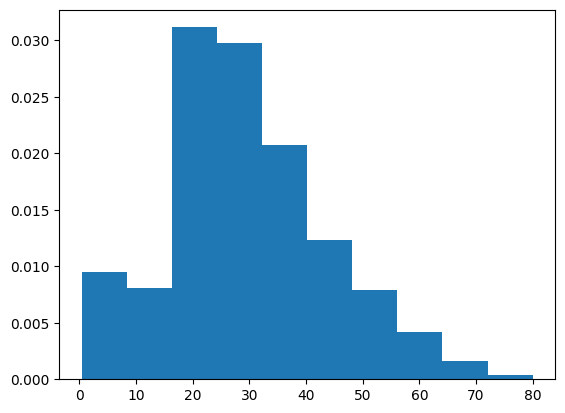

In [82]:
plt.hist(df['Age'], density=True)

In [83]:

non_missing = df['Age'].dropna().reset_index(drop=True)
age_missing = len(df) - len(non_missing)
age_missing

177

In [84]:
samples = non_missing[np.random.randint(0, high=len(non_missing), size=age_missing)]

<Axes: ylabel='Frequency'>

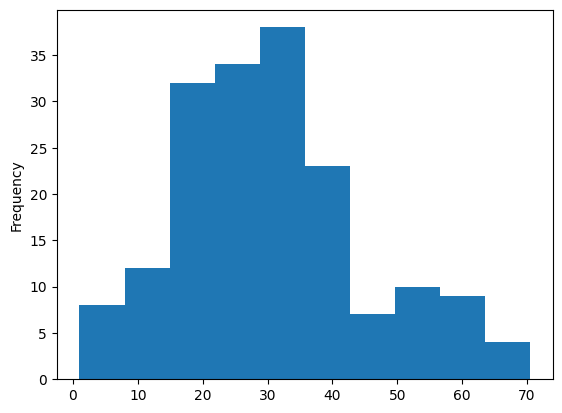

In [85]:
samples.plot(kind='hist')

# Strategy 2

In [86]:
age_mean, age_std = non_missing.mean(), non_missing.std()
samples2 = st.norm.rvs(loc=age_mean, scale=age_std, size=age_missing)

(array([ 4., 17., 27., 33., 31., 37., 12.,  9.,  5.,  2.]),
 array([-2.27809954,  5.36195184, 13.00200322, 20.64205459, 28.28210597,
        35.92215734, 43.56220872, 51.2022601 , 58.84231147, 66.48236285,
        74.12241422]),
 <BarContainer object of 10 artists>)

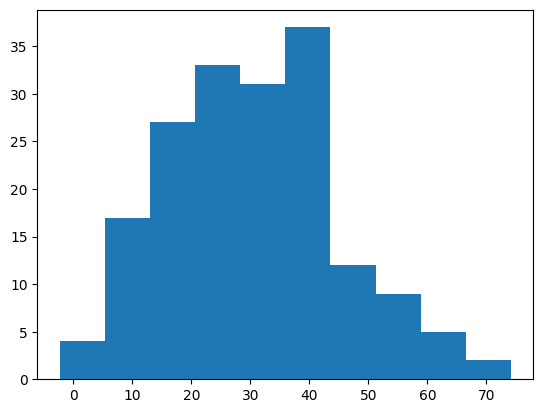

In [87]:
plt.hist(samples2)

In [88]:
pd.get_dummies(df['Sex']).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [89]:
df_petals = df_iris[0][['petal length (cm)', 'petal width (cm)']]

In [90]:
sc = sklearn.preprocessing.StandardScaler()
standard_petals = pd.DataFrame(sc.fit_transform(df_petals), columns=df_petals.columns)

In [91]:
standard_petals.describe()

,petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02
mean,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


In [92]:
mms = sklearn.preprocessing.MinMaxScaler()
normalized_petals = pd.DataFrame(mms.fit_transform(df_petals), columns=df_petals.columns)

In [93]:
normalized_petals.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,0.467458,0.458056
std,0.299203,0.317599
min,0.000000,0.000000
25%,0.101695,0.083333
50%,0.567797,0.500000
75%,0.694915,0.708333
max,1.000000,1.000000


In [94]:
train, test = sklearn.model_selection.train_test_split(df_iris[0], test_size=0.30, shuffle=True)

In [95]:
# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /home/felix/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [96]:
df_heart = pd.read_csv(path + '/heart.csv')

In [97]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No missing data so we can proceed

In [98]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [99]:
df_heart[['F', 'M']] = pd.get_dummies(df_heart['Sex']).astype(int)
df_heart.drop('Sex', axis=1, inplace=True)

In [100]:
sc = sklearn.preprocessing.StandardScaler()
df_heart['Cholesterol'] = sc.fit_transform(df_heart[['Cholesterol']])

In [101]:
df_heart.to_csv('data/heart_processed.csv', index=False)